In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")


In [2]:
def report(y_true,y_pred):
    print(classification_report(y_true,y_pred))
def matrix(y_true,y_pred, dataset):
    g=confusion_matrix(y_true,y_pred)
    ptypes=pd.DataFrame(dataset["TARGET"].value_counts())
    sns.heatmap(data=g,xticklabels=ptypes.index.sort_values(),yticklabels=ptypes.index.sort_values(),cbar=False,annot=True,cmap="Blues",fmt="g",linewidths=.5,linecolor="black")
    

In [3]:
data=pd.read_csv("E:\piere\Documentos\Portafolio\Oil Play Prediction\Data\processed\data_ready.csv")

In [4]:
X=data.drop("TARGET",axis=1)
y=data["TARGET"]

In [5]:
pt=PowerTransformer()
X=pt.fit_transform(X)

In [6]:
X_train, X_test, y_train , y_test=train_test_split(X, y, test_size=.3, random_state=42)

In [7]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [8]:
y_pred=rf.predict(X_test)

In [9]:
report(y_test,y_pred)

              precision    recall  f1-score   support

          A1       0.65      0.41      0.50       332
         AP1       0.33      0.09      0.14        22
          B1       1.00      1.00      1.00         4
          F1       0.80      0.61      0.69       571
          F2       0.95      0.99      0.97       283
          P1       0.83      0.95      0.88      2634
          R1       1.00      0.03      0.06        66
          S1       0.83      0.10      0.17        52
          X1       1.00      0.14      0.25         7
          X2       0.79      0.55      0.65        20

    accuracy                           0.82      3991
   macro avg       0.82      0.49      0.53      3991
weighted avg       0.82      0.82      0.80      3991



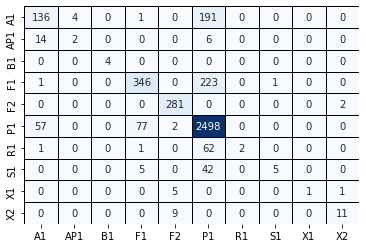

In [10]:
matrix(y_test,y_pred,data)

Como podemos observar, al momento de realizar la predicción con valores normalizados por el método de PowerTransform de Scikit-Learn, solamente aumentamos un .1% mi accuracy. Esto se lo podemos atribuir que tenemos una data Unbalance, por la cantidad de datos de P1 con respecto a los demás, cuestión que buscaremos reducir en el siguiente capítulo.

In [11]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder

In [12]:
y_enconder=LabelEncoder().fit_transform(y)

In [13]:
counter=Counter(y_enconder)

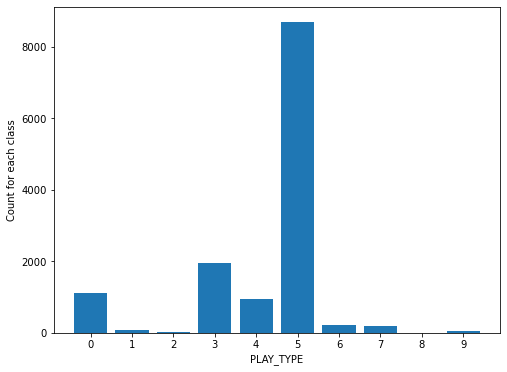

In [14]:
plt.figure(figsize=(8,6))
plt.bar(counter.keys(),counter.values())
plt.xticks([i for i in range (0,10)])
plt.xlabel("PLAY_TYPE")
plt.ylabel("Count for each class")
plt.show()

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
oversample=SMOTE()
X_over , y_over = oversample.fit_resample(X, y_enconder)

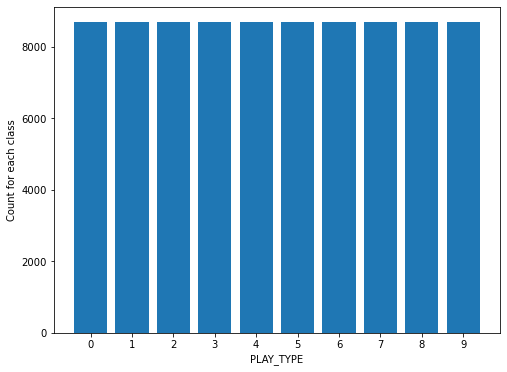

In [17]:
counter=Counter(y_over)
plt.figure(figsize=(8,6))
plt.bar(counter.keys(),counter.values())
plt.xticks([i for i in range (0,10)])
plt.xlabel("PLAY_TYPE")
plt.ylabel("Count for each class")
plt.show()

Como observamos, ya logramos equilibrar las clases mi DataSet mediante la función SMOTE de replicar los datos de mi data.

In [18]:
X_train, X_test, y_train , y_test=train_test_split(X_over, y_over, test_size=.4, random_state=42)
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [19]:
report(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3443
           1       0.98      1.00      0.99      3431
           2       1.00      1.00      1.00      3611
           3       0.90      0.94      0.92      3512
           4       1.00      1.00      1.00      3410
           5       0.88      0.74      0.81      3415
           6       0.95      0.99      0.97      3508
           7       0.97      1.00      0.98      3472
           8       1.00      1.00      1.00      3434
           9       1.00      1.00      1.00      3500

    accuracy                           0.96     34736
   macro avg       0.96      0.96      0.96     34736
weighted avg       0.96      0.96      0.96     34736



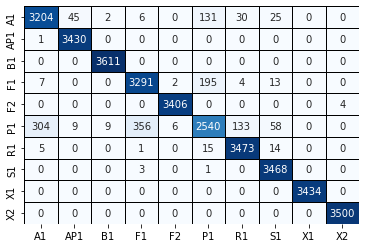

In [20]:
matrix(y_test,y_pred,data)

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [22]:
scores=cross_val_score(rf, X_over, y_over, cv=5)

In [23]:
print(f'Valores de Cross_validation para reducir tendencias de Overfit encontramos que: {scores.mean():.4f},\n con una desviación de: {scores.std()} ')

Valores de Cross_validation para reducir tendencias de Overfit encontramos que: 0.9594,
 con una desviación de: 0.002903487455503385 


Observamos que logramos incrementar el resultado de mi modelo de un 83% a un 96 %. Este incremento, lo logramos simplemente con estandarizar mis datos y realizando un oversampling de estos al ver el desbalance de las categorías. Cabe aclarar, que en el siguiente apartado verificaremos con este modelo mis resultados en la data original sin oversamplig.

In [24]:
y_test_original=LabelEncoder().fit_transform(data["TARGET"])
X_test_original=pt.fit_transform(data.drop("TARGET",axis=1))

In [25]:
y_pred_trein=rf.predict(X_test_original)

In [26]:
report(y_test_original,y_pred_trein)

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1127
           1       0.86      1.00      0.93        93
           2       0.62      1.00      0.76        16
           3       0.84      0.96      0.90      1948
           4       0.99      1.00      1.00       959
           5       0.99      0.90      0.94      8684
           6       0.60      1.00      0.75       208
           7       0.75      1.00      0.86       193
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        64

    accuracy                           0.93     13302
   macro avg       0.84      0.98      0.90     13302
weighted avg       0.94      0.93      0.93     13302



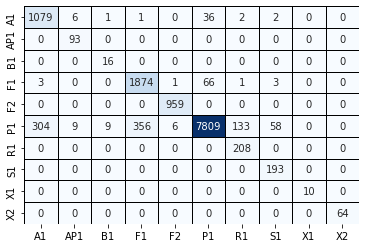

In [27]:
matrix(y_test_original, y_pred_trein, data)

# Conclusión 

Se logró desarrollar un modelo de Machine Learning, el cual logra clasificar con un 96% de accuracy, el Play donde se encuentra la arena productiva del pozo, cabe aclarar que este resultado simplemente se logró con las variables que fácilmente podemos obtener en perforación y estudios de yacimiento. Por otro lado, el modelo busca una implementación rápida y confiable para lograr toma de decisiones in situ.

Este modelo puede ser base de modelos futuros en cuál se puede buscar en la otras variables de la data original, o inclusive enriqueciendo mi base de datos con otros valores recopilados en campo. Además, en futuras ocasiones podemos implementar una red neuronal o ajustar los hiperparametros del modelo de RandomForest. 

